# Key Data Structures

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

Unlike R which has data frames as a built in data type, the Python language requires us to load a package called pandas which endows Python with dataframe-like capability. Think of data frames as being a generlization of the table format so favored by Excel enthusiasts the world over. Tabular data is easy on the human eye because generally speaking each row relates to a single observation (not always) and each column represents some tpye of measurement of attribute of that observation. 

Using the Excel comparison, a single dataframe can be considered as a single "worksheet" although one could have a structure in Python (like a dictionary or list) which could contain one or more data frames. However, we usually restrict our attention to a single dataframe at any given time. We can create dataframes ourselves though it's more common for us to get them by reading in files such as .csv files or even Excel files since Python allows us to do this. 

Of course, there are different ways in which data arrives such as by webscraping or by querying a database. It's also possible that we might use an Application Programming Interface (API) to get data in which case the data might be returned in JSON or XML format which would then require us to parse it into something more convenient. The summary is that we can't always count on data being in tabular format though frequently it is. We might have to massage the data into a format on its way to becoming a data frame. Let's look at a couple of examples.

## Lists

Let's walk through some basic examples. First up we'll review lists. A list is a container of one or more values in some type of presumed order. That is, we talk about things like the "first element", "second element" and so on until the "last element" is reached. Also, the actual list values themselves could be of different types which means that the list can contain a mixture of information. 

The following examples are not necessarily reflective of immediately practical situations but are contrived to make clear certain points which will be useful to know once you start looking at structures returned by scikit-learn. Knowing how to manage lists and dictionaries winds up being very important to get the information you want when you are accessing the quality of a model. 

In [13]:
simple_list = [0,'2',3,'4','test']

print(simple_list)

print("The length of this list is %d" % len(simple_list))

# Let's access various elements via an index or slices

print(simple_list[0:3])    # Slice from 0,1,2

print(simple_list[:3])     # Same as above 

print(simple_list[4])      # Last element

print(simple_list[-1])     # Last element

print(simple_list[-2])     # Second from the last element

print(simple_list[1:])     # Get the first element and everything thereafter

# We can change an element's value 

simple_list[1] = 2

[0, '2', 3, '4', 'test']
The length of this list is 5
[0, '2', 3]
[0, '2', 3]
test
test
4
['2', 3, '4', 'test']


More sophisticated structures are possible. We could have lists with lists as elements. This can be confusing at first.

In [12]:
new_list = [[0,1],10,20]
print(new_list[0:2])

# What is the type of each list element
[type(item) for item in new_list]

[[0, 1], 10]


[list, int, int]

We can also have something more practical. Imagine a list wherein each element could represent an employee.

In [11]:
jdoe  = ["John Doe","1313 Mockingbird Lane","Project Manager",90000,"01-01-2015"]
mdoe  = ["Mary Doe","1915 Eustice Pkwy","Administrator",100000,"12-12-2010"]

# Note the elements don't have a name so we need to index by position
employees = [jdoe, mdoe]
print("John Doe's salary is %d" % employees[0][3])

John Doe's salary is 90000


### Operations on lists

There are a variety of operations which are possible on lists:
    
<img src="pics/slatt.png">


In [14]:
# Print the list
print(simple_list)

# Reverse it - note that there is no output
simple_list.reverse()

# Now print the list again
print(simple_list)

# Okay - we could reverse the reverse operation
simple_list.reverse()

# Now print the list again
print(simple_list)

# Print the type of each element
[type(item) for item in simple_list]

[0, 2, 3, '4', 'test']
['test', '4', 3, 2, 0]
[0, 2, 3, '4', 'test']


[int, int, int, str, str]

In [15]:
# Append to the list
simple_list.append(27)
print(simple_list)

# Now delete an element
del(simple_list[0])
print(simple_list)

[0, 2, 3, '4', 'test', 27]
[2, 3, '4', 'test', 27]


Check for list memebership. With such a simple list, the utility of this is not apparent though it can save you a lot of work if you have a very large list structure. 

In [16]:
print(27 in simple_list)
print(27 not in simple_list)

True
False


List can be sorted as long as the elements are all of the same type as it doen't make sense to sort a heterogenous list. 

In [19]:
import numpy as np

same_list = [0,20,-5,6]
print(same_list)

# Now sort it
same_list.sort()
print(same_list)

# At what position does the value of "6" appear ?
print("The value %d appears at position %d within the list" % (6,same_list.index(6)))

# If we had a larger list and wanted all occurrences of a value
my_nums = list(np.random.randint(5,10,size=20))
print(my_nums)

# Find all occurences of a "7"
indices = [i for i, x in enumerate(my_nums) if x == 7]
print("A value of 7 occurs at %s" % str(indices))

import numpy as np
# Numpy also has a solution which works well for really big lists
ii = np.where(np.array(my_nums) == 7)[0]
print(ii)

[0, 20, -5, 6]
[-5, 0, 6, 20]
The value 6 appears at position 2 within the list
[7, 5, 9, 6, 8, 8, 5, 7, 5, 9, 5, 5, 9, 5, 5, 9, 8, 6, 6, 8]
A value of 7 occurs at [0, 7]
[0 7]


### From Lists To Data Frames

These next examples motivate how and why it might be useful to create a data frame out of lists especially those like the ones above. There is also the situation wherein we have array data that resembles matrix data emerging from scientific experiments. Let's simulate some of that here using the numpy module. 

In [24]:
import pandas as pd

# generate some random data in the form of a 10 row by 3 column array
data = np.random.randint(10,99,size=(3,3))

So let's generate 5 of these arrays and store them in a list. The following scenario is not uncommon in scientific circles where an experiment might dump data every 10 minutes over the course of a multi-day experiment after which you might want to combine it all into a conveninet data structure. It's also possible you might want to first filter through the data to exclude data thought to be corrupt. 

In [25]:
# Generate a 3x3 array from random integers between 5 and 30
myl = [np.random.randint(5,30,size=(3,3)) for _ in range(3)]

# List first row in every data frame
[print(i[0]) for i in myl]

# Verify the shape for every elment
[print(i.shape) for i in myl]

# We could put these in a dataframe
newdf = pd.DataFrame(np.concatenate(myl),columns=['d1','d2','d3'])
newdf.head()

[ 9 26  5]
[15 16 12]
[29  8 18]
(3, 3)
(3, 3)
(3, 3)


,d1,d2,d3
0,9,26,5
1,8,26,22
2,17,8,22
3,15,16,12
4,22,12,11


### From Dictionaries To Data Frames

Extending the above concept, many times we have data structures in dictonaries which are data structures that can involve heterogeneous data. Arrays and Series can accomodate only one data type at a time. Lists and dictonaries can handle both types. Lists can even contain dictionaries (and vice versa) such as the following which mimics what happens when you get weather updates from an on line service using an API.

In [26]:
data = [ {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}, 
         {'area': 'macon',   'rainfall': 70,  'temperature': 25}, 
         {'area': 'marietta','rainfall': 200, 'temperature': 39 }] 

So what if we wanted to summarize the rainfall for all cities ?

In [27]:
rain = []
for i, somedata in enumerate(data):
    rain.append(data[i]['rainfall'])
print(f"Mean rain fall is {np.mean(rain).round(3)}")

Mean rain fall is 123.333


But this is not convenient and wouldn't scale very well so better to make a data frame out of this since data frames have associated methods which eliminate the need to write summary loops. 

In [28]:
# Create a data from directly 
weather_df = pd.DataFrame.from_dict(data)

# Check it out
print(weather_df)

# Get the average of any column
print(f" Mean rain fall is {weather_df.rainfall.mean()}")

       area  rainfall  temperature
0   atlanta       100           20
1     macon        70           25
2  marietta       200           39
 Mean rain fall is 123.33333333333333


In [29]:
# Better yet
weather_df.describe()

,rainfall,temperature
count,3.000000,3.000000
mean,123.333333,28.000000
std,68.068593,9.848858
min,70.000000,20.000000
25%,85.000000,22.500000
50%,100.000000,25.000000
75%,150.000000,32.000000
max,200.000000,39.000000


More complex dictionaries are possible such as the one below which nests information underneath the **Temperature** key. Actually, these types of structures are common particualrly when extracing information from an API which typically will return JSON formatted information. JSON looks very much like a Python dictionary. 

In [30]:
weather = {
    'Country': 'USA',
    'City': 'Washington, D.C.',
    'Temperature': {
        'Unit': 'F',
        'Value': 54.3
    }
}
    
weather.get("Temperature",0)

{'Unit': 'F', 'Value': 54.3}

### More About Dictionaries

More explanation about dictionaries would be helpful here. Unlike lists, items in dictionaries are unordered. While visually there appears to be a "first" element, the internal structure doesn't reflect any specific order. Notice the following. Attempting to access a dictionary as if it were a list will fail. Notice first that we create the dictionary by using brace characters instead of brackets. A distinct advantage of using dictionaries is that we can name the elements using an intutiive label if we so desire.

```python
weather = {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}
weather[0]
```
<img src="pics/errors.png">


In [31]:
# Dictonaries have "keys" corresponding to which there are items

weather = {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}
print("Keys are ",weather.keys())
print("Itmes are",weather.items())

Keys are  dict_keys(['area', 'rainfall', 'temperature'])
Itmes are dict_items([('area', 'atlanta'), ('rainfall', 100), ('temperature', 20)])


While the dictionary has more intelligible names, there is less transparency when attempting to access the names and values of the dictionary when compared to the list structure. With lists, you just pick the index or slice and get what you want. We can do things like the following although unless we know the name of the information we want, then we have to loop through the structure to see what's in it.

In [32]:
# This is common though discouraged
print(weather['rainfall'])

# Use of the get method is encouraged because if the 
# key doesn't exist then we can return a value (e.g. 0)
# If we use the first method we get an error
print(weather.get('rainfall',0))

# What if the key doesn't exist ?
# This returns a value of zero
print(weather.get('aaa',0))

100
100
0


In [33]:
for key, value in enumerate(weather):
    print("Item %s has value %s" % (key, str(value)))

print("\n")

# Check this out
for key, value in weather.items():
    print("Item %s has value %s" % (key,str(value)))
    
print("\n")


# And one more pattern of access
for key in weather.keys():
    print("Item %s has value %s" % (key,str(weather.get(key,0))))

Item 0 has value area
Item 1 has value rainfall
Item 2 has value temperature


Item area has value atlanta
Item rainfall has value 100
Item temperature has value 20


Item area has value atlanta
Item rainfall has value 100
Item temperature has value 20


Here is a practical example of what one could do with a dictionary. We want to count the number of times any single character appears within a sentence. This is a very crude form of text modeling wherein we could do frequency analysis of letters. Obviosuly we would expect the vowels to be more frequent. 

In [34]:
import pprint
message = 'It was a bright cold day in April, and the clocks were striking thirteen.'
count = {}

for character in message:
    count.setdefault(character, 0)
    count[character] = count[character] + 1

count

{'I': 1,
 't': 6,
 ' ': 13,
 'w': 2,
 'a': 4,
 's': 3,
 'b': 1,
 'r': 5,
 'i': 6,
 'g': 2,
 'h': 3,
 'c': 3,
 'o': 2,
 'l': 3,
 'd': 3,
 'y': 1,
 'n': 4,
 'A': 1,
 'p': 1,
 ',': 1,
 'e': 5,
 'k': 2,
 '.': 1}

In [35]:
# Let's normalize everything to lower case so we don't have
# ambiguities 

count = {}

for character in message.lower():
    count.setdefault(character, 0)
    count[character] = count[character] + 1

count

{'i': 7,
 't': 6,
 ' ': 13,
 'w': 2,
 'a': 5,
 's': 3,
 'b': 1,
 'r': 5,
 'g': 2,
 'h': 3,
 'c': 3,
 'o': 2,
 'l': 3,
 'd': 3,
 'y': 1,
 'n': 4,
 'p': 1,
 ',': 1,
 'e': 5,
 'k': 2,
 '.': 1}

Is there a way to sort this stucture to make it easy to see what the most frequently used letters were ? Note that if you just type the name of the dictionary it will simply print it out in some random order. Let's see what happens when we try to sort. This first example will look at the items in the dictionary and look at the first element (they key name) and sort by that which since these are letters then they will be in alphabetical order. 

In [36]:
print(count.items())
print("\n")

# Sort the items
sorted(count.items())

dict_items([('i', 7), ('t', 6), (' ', 13), ('w', 2), ('a', 5), ('s', 3), ('b', 1), ('r', 5), ('g', 2), ('h', 3), ('c', 3), ('o', 2), ('l', 3), ('d', 3), ('y', 1), ('n', 4), ('p', 1), (',', 1), ('e', 5), ('k', 2), ('.', 1)])




[(' ', 13),
 (',', 1),
 ('.', 1),
 ('a', 5),
 ('b', 1),
 ('c', 3),
 ('d', 3),
 ('e', 5),
 ('g', 2),
 ('h', 3),
 ('i', 7),
 ('k', 2),
 ('l', 3),
 ('n', 4),
 ('o', 2),
 ('p', 1),
 ('r', 5),
 ('s', 3),
 ('t', 6),
 ('w', 2),
 ('y', 1)]

In [37]:
sorted_freq = sorted(count.items(), key = lambda kv: kv[1], reverse=True)
sorted_freq

[(' ', 13),
 ('i', 7),
 ('t', 6),
 ('a', 5),
 ('r', 5),
 ('e', 5),
 ('n', 4),
 ('s', 3),
 ('h', 3),
 ('c', 3),
 ('l', 3),
 ('d', 3),
 ('w', 2),
 ('g', 2),
 ('o', 2),
 ('k', 2),
 ('b', 1),
 ('y', 1),
 ('p', 1),
 (',', 1),
 ('.', 1)]

All of this is kind of a pain so a better approach is to turn the dictionary into a data frame which generally speaking makes things easier to manage. Let's do this.

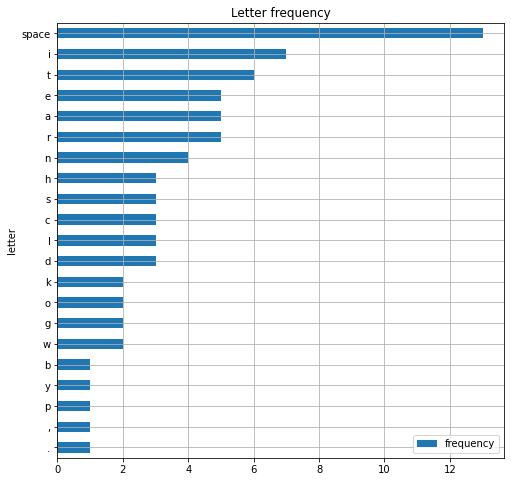

In [38]:
import matplotlib.pyplot as plt

# Let's use a data frame to help us out
newdf = pd.DataFrame.from_dict(count.items())
newdf.columns = ['letter','frequency']

# Now let's sort the data frame
newdf.sort_values('frequency',inplace=True)

# Replace the " " with the word "space"
newdf.replace(" ","space",inplace=True)

# Make the plot happen
newdf.set_index("letter").plot(kind="barh",title="Letter frequency", figsize=(8,8)) 
plt.grid()

Let's work through the following example which uses an API to fetch some information. Check out this [web page](https://www.engineeringbigdata.com/api-and-json-example-in-python/) which contains the primary content for most of this example. This uses the [Datamuse API Word-Finding Query](http://www.datamuse.com/api/)


> The Datamuse API is a free API that requires no sign-up or tokens for use. This API is great for developers as a word-finding query engine and is for use in your apps to find words that will match a set of constraints. Also, developers can specify a wide variety of constraints such as meaning, spelling, sound, vocabulary in the word-finding query.

In this example we will find words with a meaning similar to "engineering big data". This is a very basic example API and JSON code to print out the data that this tutorial is searching for. As one can see, there is no need for API keys or tokens in this example.

In [39]:
import json
import urllib.request as urllib2
 
api_url = 'https://api.datamuse.com/words?ml=python&max=5'
data = json.load(urllib2.urlopen(api_url))
 
def datamuse_api():
    print(data)
 
datamuse_api()

[{'word': 'monty', 'score': 57740, 'tags': ['n', 'prop']}, {'word': 'boa constrictor', 'score': 51312, 'tags': ['n']}, {'word': 'snake', 'score': 51311, 'tags': ['n']}, {'word': 'crocodile', 'score': 51310, 'tags': ['n']}, {'word': 'reptile', 'score': 51309, 'tags': ['n']}]


We won't be working through the rest of the example on the website although it is pretty interesting. It basically looks for words that are similar to "Python". As for our interests, the larger point here is that we now have what appears to be a dictionary although it is also JSON. We can parse this information into a dataframe and work with much easier there as long as we understand the process isn't perfect. Note that the tags column can have a list with multiple values. We might want to make other columns to hold tags or somehow make the number of tags symmetrial. 

In [40]:
pd.DataFrame.from_dict(data)

,word,score,tags
0,monty,57740,"[n, prop]"
1,boa constrictor,51312,[n]
2,snake,51311,[n]
3,crocodile,51310,[n]
4,reptile,51309,[n]


### Dictionaries And scikit-learn

Dictionaries are very important to understand as they are frequently used in scikit-learn work.

In [41]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

# Load some data
iris = datasets.load_iris()

# Set some parameters for the SVM method
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Make an instance of s SVM
svc = svm.SVC()

# Now do the GridSearch
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

# guess what we get back ?
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [42]:
clf.cv_results_

{'mean_fit_time': array([0.00075746, 0.00074677, 0.00054026, 0.00050435]),
 'std_fit_time': array([7.20716926e-05, 4.69778749e-05, 3.78585882e-05, 1.25115019e-05]),
 'mean_score_time': array([0.00046239, 0.00035357, 0.00031466, 0.00032144]),
 'std_score_time': array([1.77538238e-04, 3.49587009e-05, 6.90819057e-05, 1.06330239e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.96666667, 0.96666667, 1.        , 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 1.        , 1.        ]),
 'split2_test_score': array([0.96666667, 0.96666667, 0

In [43]:
results = clf.cv_results_
for key, value in results.items():
    print(type(value))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
results.get('params')

[{'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'rbf'}]

## Series 

Series can thought of as one dimensional arrays or one dimensional data frames. The R equivalent of Series is a vector structure. One of the more common uses for Series is as a random number generator for various simulations. The advantage of using a Series of things is that there are lots of methods that can be used on them. Still, many times they wind up becoming part of a matrix or dataframe so in general we don't do a lot of work using just one Series object. 

In [45]:
import pandas as pd
my_series = pd.Series(range(50))

print("Mean is:",my_series.mean())
print("Cumulative sum is:",my_series.cumsum()[49])
print("Series Description:",my_series.describe())

Mean is: 24.5
Cumulative sum is: 1225
Series Description: count    50.00000
mean     24.50000
std      14.57738
min       0.00000
25%      12.25000
50%      24.50000
75%      36.75000
max      49.00000
dtype: float64


0    25
1    39
2    12
3    41
4    49
5    23
6    48
7    17
8    22
9    42
dtype: int64


<AxesSubplot:title={'center':'Line Plot'}>

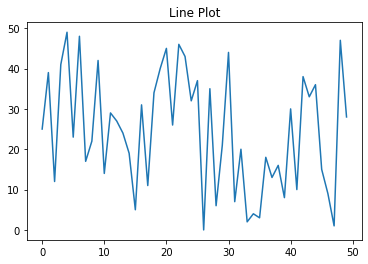

In [46]:
import random
random.shuffle(my_series)  # Shuffle in list values around

# the numbers are now shuffled
print(my_series[0:10])

# Series have built in plot methods
my_series.plot.line(title="Line Plot")

Random set of uniform numbers: [0.13357263 0.12042512 0.42318254 0.01763445]
Random uniform array:
 [[0.21307329 0.76984429 0.54936635 0.05195312]
 [0.03694946 0.58045079 0.01931945 0.96360083]
 [0.55391444 0.18825436 0.44476412 0.63233379]
 [0.32681079 0.33033953 0.97882539 0.61917089]]
Random integer array:
 [7 5 9 6 9]


<AxesSubplot:ylabel='Frequency'>

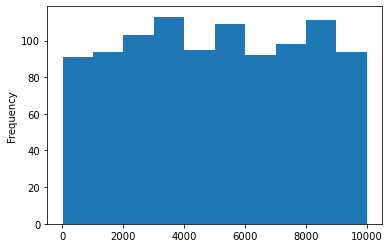

In [47]:
# Get an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1).

print("Random set of uniform numbers:",np.random.rand(4))
print("Random uniform array:\n",np.random.rand(4,4))

# Return random integers from the “discrete uniform” distribution 
print("Random integer array:\n",np.random.randint(5,10,size=5))

# Turn the array into a Series which has built in plot methods
pd.Series(np.random.randint(1,10000,size=1000)).plot.hist()

Here is a powerful way to generate data from common statisitcal distributions.

array([[6.37800189, 0.83974761, 7.06099055, 3.54165036],
       [2.74632915, 3.21025941, 2.3810294 , 4.64622193]])

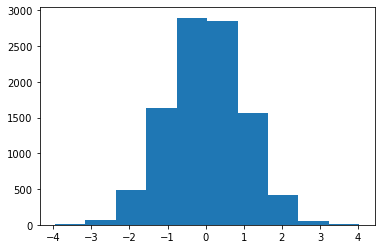

In [48]:
# 10,000 values from a N(0,1) distribution
plt.hist(np.random.normal(0,1,10000))

np.random.normal(3, 2.5, size=(2, 4))

Text(0.5, 1.0, 'Uniform Distribution')

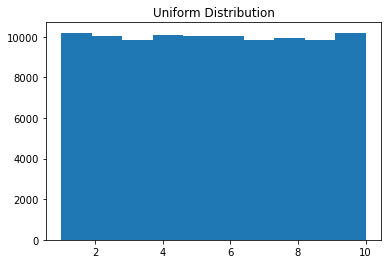

In [49]:
uni = np.random.uniform(1,10,100000)
plt.hist(uni)
plt.title("Uniform Distribution")

## Data Frame Walkthrough

As an Emory affiliate, you have free access to the catalogue of O'Reilly and Safari technical publications which are likely to be helpful to you in this course and in general programming and machine learning work. Go to the [login link](https://business.library.emory.edu/research-learning/databases/safari.php) which will then take you to the O'Reilly login page. 

<img src="pics/oreilly.png">

It might ask you to identify your institution although I think you have to click the "don't see my institution listed" category after which is will ask you for your Emory id information. This processs should allow you total access to the entire catalogue. In this notebook I'm using material based in part on the following publication:

> The Data Wrangling Workshop - Second Edition
  By Brian Lipp, Shubhadeep Roychowdhury and Dr. Tirthajyoti Sarkar

You can refer directly to that publication if you so wish though I also include lots of examples that aren't part of that text.  

In [50]:
# xlrd is an Excel file reader library - You probably have to install this 
# pip install xlrd

import xlrd

# Read in a sales worksheet
url = "https://raw.githubusercontent.com/steviep42/bios_534_spring_2021/main/data/superstore.xls"
df = pd.read_excel(url)

# What have we here ?
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


This looks like product sales information which includes a number of details. The first row, "Row ID" is redundant so we can probably get rid of it.

In [51]:
print("There are %d columns" % df.columns.shape[0])
[i for i in df.columns]

There are 21 columns


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [52]:
df.drop('Row ID',axis=1,inplace=True)

In [53]:
print("There are %d columns" % df.columns.shape[0])

# Notice that Row ID has been removed
[i for i in df.columns]

There are 20 columns


['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

### Subsetting

Subsetting data is a big thing with dataframes. There are at least two scenarios at work here: 

   - Wanting to see some number of rows from the dataframe and/or 
   - some subset of data which satisfies some criteria. 
   
In combination with either of these, you might want to limit the columns of interest. Pandas has two functions called [**loc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [**iloc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) which are commonly used to access information residing in data frames. There are some shortcuts that don't require the use of either although in my opinion it's best to use one or the other until you become more proficient with pandas dataframe subsetting.

In [54]:
# iloc is used for numeric access
df.iloc[0:5,0:2]

,Order ID,Order Date
0,CA-2016-152156,2016-11-08
1,CA-2016-152156,2016-11-08
2,CA-2016-138688,2016-06-12
3,US-2015-108966,2015-10-11
4,US-2015-108966,2015-10-11


In [55]:
# loc is used for column or index access
df.loc[0:5,['Order ID',"Order Date"]]

,Order ID,Order Date
0,CA-2016-152156,2016-11-08
1,CA-2016-152156,2016-11-08
2,CA-2016-138688,2016-06-12
3,US-2015-108966,2015-10-11
4,US-2015-108966,2015-10-11
5,CA-2014-115812,2014-06-09


In [56]:
df.index

RangeIndex(start=0, stop=9994, step=1)

We can access indivual columns a couple of ways

In [57]:
df.Sales

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [58]:
df.Sales.mean()

229.8580008304938

In [59]:
df.loc[:,['Sales','Profit']]

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


<AxesSubplot:>

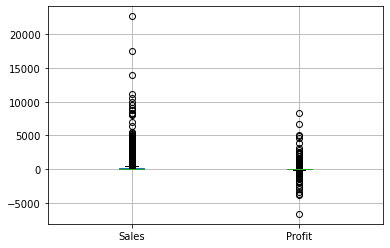

In [60]:
df.loc[:,['Sales','Profit']].boxplot()

<AxesSubplot:>

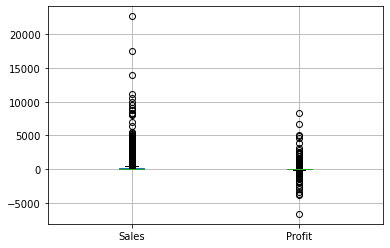

In [61]:
df[['Sales','Profit']].boxplot()

In [ ]:
df.loc[df.Sales < 100,['Sales','Profit']].boxplot()

The way this works is that providing a boolean phrase results in a True / False value which in turn dictates what values get displayed.

In [62]:
df.Sales > 3000

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Sales, Length: 9994, dtype: bool

In [63]:
df.loc[df.Sales > 3000,['Sales','Profit']]

,Sales,Profit
27,3083.430,-1665.0522
165,8159.952,-1359.9920
251,3347.370,636.0003
262,3059.982,-509.9970
318,3991.980,1995.9900
...,...,...
9639,4297.644,-1862.3124
9649,3406.664,160.3136
9660,3023.928,226.7946
9741,4404.900,1013.1270


One thing I always want to know is what columns are factors / categories and which are continuous in nature. This provides some insight into how I might summarize the data. For example, wanting to know how much profit there was by State might be useful to know. But first, let's see what the number of unique values there are for each column

In [64]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

This is very useful in that we can see that things like Segment, Ship Mode, Region, and Category are clearly categories since they take on only a few unique values. It's possible that columns like State are also categories even though there are 49 unique values. I would imagine that not every state has equal sales and profit. It looks like the creators of this information have already included a region column to make it easy for us to summarize sales by region. Now that we understand these differences, we can start to ask some questions.

In [65]:
# What is the distribution of shipment methods
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [66]:
# Let's see how many sales there were that exceed the mean Sales 
# Pull out only the Sales and Shipping Mode columns

df.loc[df["Sales"] > df["Sales"].mean(),['Sales','Ship Mode']]

,Sales,Ship Mode
0,261.9600,Second Class
1,731.9400,Second Class
3,957.5775,Standard Class
7,907.1520,Standard Class
10,1706.1840,Standard Class
...,...,...
9973,271.9600,Standard Class
9976,249.5840,Standard Class
9979,437.4720,Standard Class
9991,258.5760,Standard Class


In [67]:
# This will show only how many records there are
df.loc[df["Sales"] > df["Sales"].mean(),['Sales','Ship Mode']].shape[0]

2360

In [68]:
# How many orders were there from Georgia that exceeded the average sales ?
df.loc[(df["State"] == "Georgia") & (df["Sales"] > df["Sales"].mean())].shape[0]

51

In [69]:
# Note that if the column name has no spaces then we can do the following
# which uses the "dot" notation
df.loc[(df.State == "Georgia") & (df.Sales > df.Sales.mean())].shape[0]

51

In [70]:
# The same as above but get only those sales that were shipped first class

# Might be more legible to create a Boolean expression first 
indices = (df.State == "Georgia") & (df.Sales > df.Sales.mean()) & (df["Ship Mode"] == "First Class")

# Now we use this to subset the data frame
df.loc[indices,["City","State","Ship Mode","Sales"]]

,City,State,Ship Mode,Sales
359,Columbus,Georgia,First Class,647.84
3048,Columbus,Georgia,First Class,411.80
3049,Columbus,Georgia,First Class,360.00
4423,Sandy Springs,Georgia,First Class,302.94
6150,Columbus,Georgia,First Class,354.90
7193,Atlanta,Georgia,First Class,1350.12
9882,Woodstock,Georgia,First Class,272.61


In [71]:
# What were the 5 highest sales ? 
df.nlargest(5,"Sales")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [72]:
# In what cities did they occur ?
df.nlargest(5,"Sales")[["City","Sales"]]

,City,Sales
2697,Jacksonville,22638.480
6826,Lafayette,17499.950
8153,Seattle,13999.960
2623,New York City,11199.968
4190,Newark,10499.970


### Grouping

So remember when I talked about identifying which columns represented groups or categories ? This is where that exercise comes in handy. We can "Split" or "group" the data frame by a grouping factor which is the name of one of the columns. This is useful to split data into groups and implement some function over thowe gorups. We can also (re)combine this information into another structure. We can also apply some statistical summary functions to each group. Let's do some grouping of the Sales data and apply some summary functions to help us understand the data

In [73]:
df_subset = df.loc[:,["Ship Mode","State","Sales"]]
df_subset.head()

,Ship Mode,State,Sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
2,Second Class,California,14.6200
3,Standard Class,Florida,957.5775
4,Standard Class,Florida,22.3680


In [74]:
# Do the grouping - Not much seems to be happening 
bystate = df_subset.groupby("State")
bystate

In [75]:
bystate.mean()

,Sales
State,
Alabama,319.846557
Arizona,157.508933
Arkansas,194.635500
California,228.729451
Colorado,176.418231
Connecticut,163.223866
Delaware,285.948635
District of Columbia,286.502000
Florida,233.612815


In [76]:
# Let's get the highest sales
bystate.mean().nlargest(5,"Sales")

,Sales
State,
Wyoming,1603.136000
Vermont,811.760909
Nevada,428.951333
Rhode Island,404.070643
Montana,372.623467


In [77]:
# Could also just sort the dataframe
bystate.mean().sort_values(by='Sales', ascending=False).iloc[0:5]

,Sales
State,
Wyoming,1603.136000
Vermont,811.760909
Nevada,428.951333
Rhode Island,404.070643
Montana,372.623467


In [78]:
# Get summary sales statistics for California and Georgia
bystate.describe().loc[['California','Georgia']]

Sales                                                        \
             count        mean         std   min    25%     50%      75%   
State                                                                      
California  2001.0  228.729451  491.005264  0.99  19.76  61.020  225.296   
Georgia      184.0  266.825217  637.796228  1.78  19.23  70.955  250.440   

                     
                max  
State                
California  8187.65  
Georgia     6354.95

In [79]:
# Now get the sales statisitcs for every City in each State
byStateCity = df.groupby(['State','City'])

# This is probably too much info
byStateCity.describe()['Sales']

count         mean         std       min        25%  \
State     City                                                              
Alabama   Auburn        6.0   294.471667  361.914543     3.760     8.8050   
          Decatur      13.0   259.601538  385.660903    14.940    23.9200   
          Florence      5.0   399.470000  796.488863     4.980     7.2700   
          Hoover        4.0   131.462500  230.646923     7.160    13.3925   
          Huntsville   10.0   248.437000  419.576667     3.620    26.8700   
...                     ...          ...         ...       ...        ...   
Wisconsin Superior      9.0   144.414444  213.394065     5.560    17.1200   
          Waukesha      1.0    54.500000         NaN    54.500    54.5000   
          Wausau        4.0    79.370000  111.450605    12.390    20.0325   
          West Allis    2.0   125.240000  165.067007     8.520    66.8800   
Wyoming   Cheyenne      1.0  1603.136000         NaN  1603.136  1603.1360   

                           50%        75%       max  
State     City                                       
Alabama   Auburn       182.030   456.4075   900.080  
          Decatur       44.950   239.9200  1215.920  
          Florence      12.480   152.7600  1819.860  
          Hoover        20.725   138.7950   477.240  
          Huntsville    81.920   171.8075  1319.960  
...                        ...        ...       ...  
Wisconsin Superior      47.400   125.9900   629.100  
          Waukesha      54.500    54.5000    54.500  
          Wausau        29.605    88.9425   245.880  
          West Allis   125.240   183.6000   241.960  
Wyoming   Cheyenne    1603.136  1603.1360  1603.136  

[604 rows x 8 columns]

In [81]:
# Let's zone in on Georgia 
byStateCity.describe()['Sales'].loc["Georgia"]

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Athens,8.0,215.101250,346.513785,12.78,15.5625,117.445,191.4300,1049.93
Atlanta,39.0,440.970256,1134.579541,2.74,14.9050,67.800,223.7750,6354.95
Columbus,68.0,218.309559,404.271301,3.76,31.8650,69.170,294.9775,2939.93
East Point,3.0,89.466667,70.403705,27.42,51.2100,75.000,120.4900,165.98
Macon,6.0,60.668333,47.597718,7.16,34.4475,48.800,77.5900,142.40
Marietta,7.0,419.802857,535.060752,5.64,80.0100,182.670,663.4950,1263.30
Roswell,18.0,369.573333,666.660391,1.78,15.9450,104.130,337.6800,2690.97
Sandy Springs,14.0,142.645000,332.815411,5.95,15.3075,25.995,81.4200,1266.86
Smyrna,17.0,140.606471,140.443873,5.67,17.9400,119.560,167.9600,484.83


In [82]:
# Let's zone in on Georgia and get just the number of sales and average sales amount
# Let's sort the result on the mean to see what cities ordered the most stuff

byStateCity.describe()['Sales'].loc["Georgia"][["count","mean"]].sort_values(by="mean",ascending=False)

,count,mean
City,,
Atlanta,39.0,440.970256
Marietta,7.0,419.802857
Roswell,18.0,369.573333
Columbus,68.0,218.309559
Warner Robins,2.0,217.400000
Athens,8.0,215.101250
Woodstock,2.0,143.325000
Sandy Springs,14.0,142.645000
Smyrna,17.0,140.606471


In [85]:
# If the above is too much at once then feel free to break it down 

bysales = byStateCity.describe()['Sales']
gasales = bysales.loc["Georgia"]
summary = gasales[["count","mean"]].sort_values(by="mean",ascending=False)

summary

,count,mean
City,,
Atlanta,39.0,440.970256
Marietta,7.0,419.802857
Roswell,18.0,369.573333
Columbus,68.0,218.309559
Warner Robins,2.0,217.400000
Athens,8.0,215.101250
Woodstock,2.0,143.325000
Sandy Springs,14.0,142.645000
Smyrna,17.0,140.606471


### Outliers

We'll cover this in more detail when we discuss Data PreProcessing. There are a number of ways to do identify outliers but we'll cover a few here. First, let's intentionally introduce some outlier information. 

In [86]:
# Sample 50 rows from the larger data set
df_sample = df[['Customer Name','State','Sales','Profit']] \
               .sample(n=50).copy()

# On the 6th and 16th rows, set the corresponding sales 
# values to -1000 and -500 respectively

df_sample['Sales'].iloc[5] = -1000
df_sample['Sales'].iloc[15]= -500.0

/Users/esteban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Let's plot the data in the form of a boxplot. Outliers are typically outside the IQR, the inter quartile range, and in this case we can see the -1000 value in the Sales column. Having negative values in Profit, however, can be legitimate since not all sales result in a profit. 

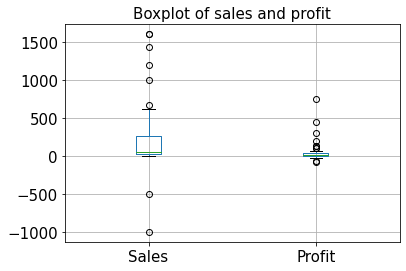

In [87]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

<AxesSubplot:ylabel='Frequency'>

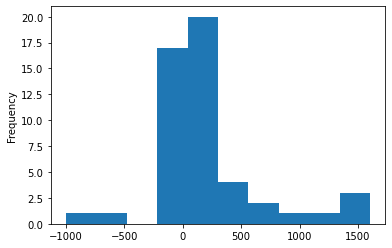

In [88]:
df_sample["Sales"].plot.hist(bins=10)

The following example is taken from [this web site](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/). This illustrates a couple of approaches to outlier detection.

In [89]:
from sklearn.ensemble import IsolationForest

# The contamination arguments let's us specify and expected amount
# of outliers within the dataset
iso = IsolationForest(contamination=0.1)

# Next we do some predictions to see which rows might be outliers
yhat = iso.fit_predict(df_sample[["Sales","Profit"]])

# select all rows that are outliers
mask = yhat == -1
df_sample.loc[mask]

,Customer Name,State,Sales,Profit
5297,Tony Molinari,New York,-1000.000,135.9800
8178,Toby Gnade,Washington,999.980,449.9910
3484,Corey Catlett,Virginia,1202.940,300.7350
4639,Jill Fjeld,Virginia,1599.920,751.9624
5869,Michelle Arnett,Wyoming,1603.136,100.1960


In [90]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=3)

# Next we do some predictions to see which rows might be outliers
yhat = clf.fit_predict(df_sample[["Sales","Profit"]])

# select all rows that are outliers
mask = yhat == -1
df_sample.loc[mask]

,Customer Name,State,Sales,Profit
5297,Tony Molinari,New York,-1000.000,135.9800
7516,John Lee,Kentucky,-500.000,7.4824
9476,Janet Molinari,Illinois,51.560,-61.8720
8512,Noel Staavos,Texas,73.784,-77.4732
4056,Suzanne McNair,Pennsylvania,67.176,-20.1528
9717,Annie Thurman,Texas,79.960,7.9960


### Apply User Defined Functions

We can apply user defined functions to specific columns in a data frame. This gives us the ability to create new columns on the fly which might later be useful such as when plotting data.

In [91]:
# Define a function
def categorize_sales(price):
    if price < 50:
        return "Low"
    elif price < 200:
        return "Medium"
    else:
        return "High"

# Apply it to the Sales column
df["Sales"].apply(categorize_sales)

# Now attach it to a data frame
df["Category"] = df["Sales"].apply(categorize_sales)

# Verify that the new column exists
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,High,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,High,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Low,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,High,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Low,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot:>

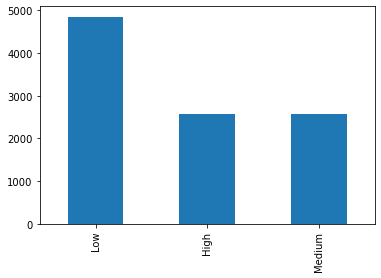

In [92]:
df.Category.value_counts().plot(kind="bar")

It bears pointing out that there can be different data types in a data frame which we can see via the **dtypes** attribute.

In [93]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [94]:
# We can select or exclude specific types
df.select_dtypes("float")

,Sales,Discount,Profit
0,261.9600,0.00,41.9136
1,731.9400,0.00,219.5820
2,14.6200,0.00,6.8714
3,957.5775,0.45,-383.0310
4,22.3680,0.20,2.5164
...,...,...,...
9989,25.2480,0.20,4.1028
9990,91.9600,0.00,15.6332
9991,258.5760,0.20,19.3932
9992,29.6000,0.00,13.3200


In [95]:
df.select_dtypes(exclude="float").iloc[0:5,0:5]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335


## Plotting

This is probably one of the more tedious aspects of Python just as learning ggplot2 or lattice graphics might be in R. Graphics packages are developed using somewhat arbitrary concepts but once you have worked a few examples at least you have a shot at making things work. For this course, you will see many examples. 

Text(0.5, 1.0, 'Two Functions')

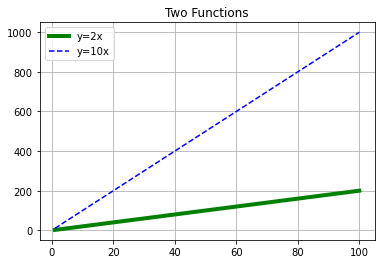

In [272]:
x = np.linspace(1,100,200)
y1 = 2*x
y2 = 10*x
# 
plt.figure(figsize=(6,4))
plt.plot(x,y1,label="y=2x",lw=4,c="green")
plt.plot(x,y2,label="y=10x",ls="--",c="blue")
plt.legend()
plt.grid()
plt.title("Two Functions")

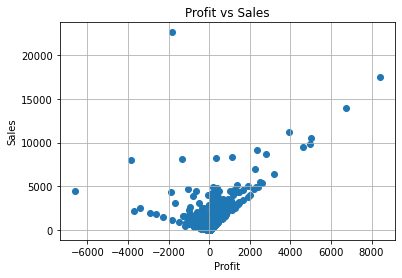

In [273]:
import matplotlib.pyplot as plt
# You can start plotting

plt.scatter('Profit','Sales',data=df)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Profit vs Sales")
plt.grid()

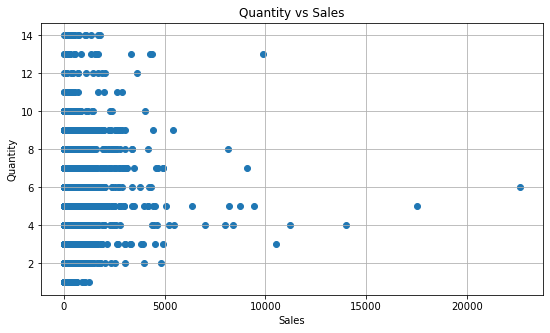

In [274]:
# But we can setup a plot with some defaults
plt.figure(figsize=(9,5))   # Setup a Plot with some defaults
plt.scatter("Sales","Quantity",data=df)
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.title("Quantity vs Sales")
plt.grid()

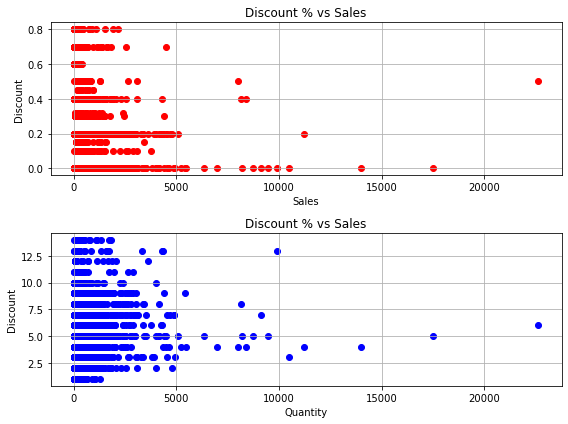

In [275]:
plt.figure(figsize=(8,6),tight_layout=True)   # Setup a Plot with some defaults
#plt.tight_layout(h_pad=2)

# A figure can contain subplots

plt.subplot(2,1,1) 
plt.scatter("Sales","Discount",data=df,c="red")
plt.xlabel("Sales")
plt.ylabel("Discount")
plt.title("Discount % vs Sales")
plt.grid()

# 

plt.subplot(2,1,2)
plt.scatter("Sales","Quantity",data=df,c="blue")
plt.xlabel("Quantity")
plt.ylabel("Discount")
plt.title("Discount % vs Sales")
plt.grid()


In [276]:
# Let's plot the Ga Sales per Order vs Alabama Sales per Order
ga_sales = df[df.State == "Georgia"]
ala_sales = df[df.State == "Alabama"]

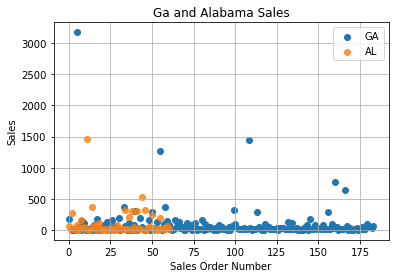

In [277]:
plt.scatter(range(0,len(ga_sales)),ga_sales.Profit,label="GA")
plt.scatter(range(0,len(ala_sales)),ala_sales.Profit,label="AL",alpha=0.8)
plt.legend()
plt.xlabel("Sales Order Number")
plt.ylabel("Sales")
plt.title("Ga and Alabama Sales")
plt.grid()

<AxesSubplot:title={'center':'Sales'}, xlabel='State'>

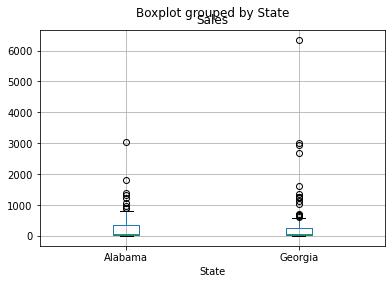

In [278]:
ga_ala = pd.concat([ga_sales,ala_sales])
ga_ala.boxplot(column='Sales',by='State')

array([<AxesSubplot:title={'center':'Alabama'}>,
       <AxesSubplot:title={'center':'Georgia'}>], dtype=object)

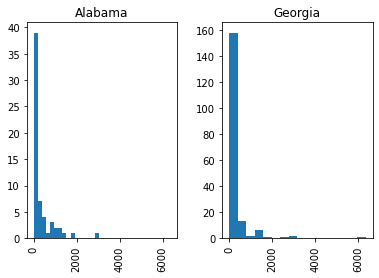

In [279]:
ga_ala = pd.concat([ga_sales,ala_sales])
ga_ala.hist(column='Sales',by='State',sharex=True,bins=16)

Here is a more practical example that builds a regression model to predict the MPG of a car related data set. We use something called Cross Fold Validation where we look at, in this case, four different versions of the data. We build on each of these versionsand then plot the predicted MPG vs the actual MPG in the 

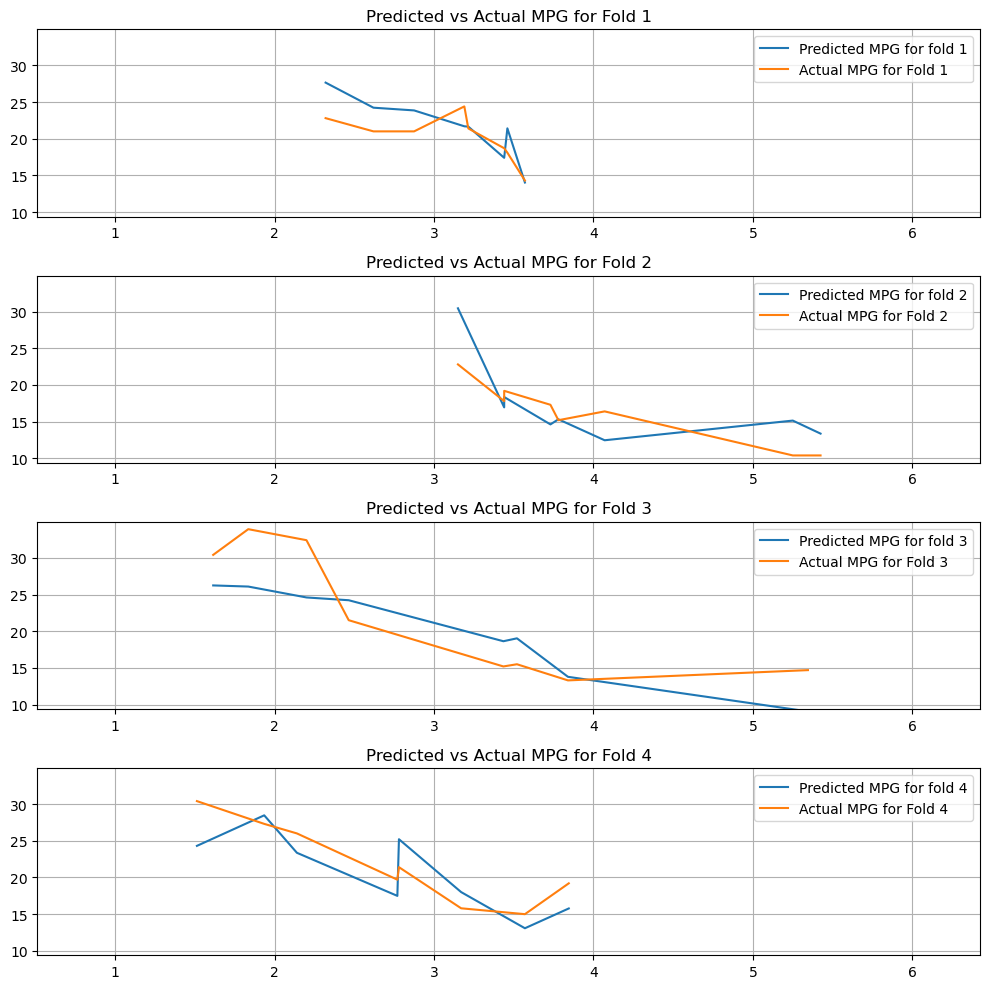

In [413]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

ii = 1
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)


mtvals = mtcars.values            # creates a numpy array

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

wtcol = 4
nfold = 4
kfold = KFold(nfold)

# Main processing loop for the folds

plt.figure(figsize=(10,10),tight_layout=True)

for train_index, test_index in kfold.split(X, y):
  # split data coming from each of the 4 folds
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        # Initialize a model
        regress = LinearRegression()
        
        # Fit the Model
        regress.fit(X_train,Y_train)
        
        # Now let's do a prediction on the test data
        predict_test = regress.predict(X_test)
    
        # This zip is necessary sometimes to sort the X values with their
        # correspinding y values 
        xs, ys = zip(*sorted(zip(X_test[:,wtcol], predict_test)))
    
        plotfac = 1    # A spacing factor
        
        # Create some subplots
        plt.subplot(nfold,1,ii)
        
        # Create some annotation info and axis limits
        label = f'Predicted MPG for fold %s' % ii
        plt.plot(xs,ys,label=label)
        plt.xlim([X[:,4].min()-plotfac,X[:,wtcol].max()+plotfac])
        plt.ylim([y.min()-plotfac,y.max()+plotfac])
        
        # correlate the Xs to the Ys like before 
        xs, ys = zip(*sorted(zip(X_test[:,wtcol], Y_test)))
        label = f'Actual MPG for Fold %s' % ii
        plt.plot(xs,ys,label=label)
        plt.grid()
        plt.legend()
        plt.title(f'Predicted vs Actual MPG for Fold %s' % ii)
        ii = ii+1

plt.show()

In [412]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


In [399]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']